In [1]:
import pandas as pd

In [2]:
kk = pd.read_csv('/kaggle/input/b2assignment/AirQualityodisha.csv')
kk.head()

,Stn Code,Sampling Date,State,City,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,68,02-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,11,24,143,102.0
1,68,06-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,10,23,133,96.0
2,68,09-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,8,25,125,116.0
3,68,13-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,10,25,137,107.0
4,68,16-01-15,Odisha,Talcher,"T.T.P.S.Colony, Talcher",Odisha State Pollution Control Board,Industrial Area,9,26,186,118.0


In [3]:
kk.columns

Index(['Stn Code', 'Sampling Date', 'State', 'City',
       'Location of Monitoring Station', 'Agency', 'Type of Location', 'SO2',
       'NO2', 'RSPM/PM10', 'PM 2.5'],
      dtype='object')

In [8]:
kk.dtypes

Stn Code                            int64
Sampling Date                      object
State                              object
City                               object
Location of Monitoring Station     object
Agency                             object
Type of Location                   object
SO2                                 int64
NO2                                 int64
RSPM/PM10                           int64
PM 2.5                            float64
dtype: object

In [9]:
kk.State.unique()

array(['Odisha'], dtype=object)

In [19]:
kk['City'].unique()

array(['Talcher', 'Angul', 'Rourkela', 'Rayagada', 'Bhubaneswar',
       'Cuttack', 'Sambalpur', 'Balasore', 'Berhampur', 'Keonjhar',
       'Paradeep', 'Kalinga Nagar', 'Konark', 'Puri'], dtype=object)

In [20]:
kk = kk.drop(axis=1,columns=['Location of Monitoring Station','Agency','Sampling Date'])

In [21]:
kk.head()

,Stn Code,State,City,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,68,Odisha,Talcher,Industrial Area,11,24,143,102.0
1,68,Odisha,Talcher,Industrial Area,10,23,133,96.0
2,68,Odisha,Talcher,Industrial Area,8,25,125,116.0
3,68,Odisha,Talcher,Industrial Area,10,25,137,107.0
4,68,Odisha,Talcher,Industrial Area,9,26,186,118.0


In [22]:
kk.describe()

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
count,2392.000000,2392.000000,2392.000000,2392.000000,2060.000000
mean,486.654264,4.938545,17.698997,88.301003,42.472816
std,220.239379,4.244315,6.705531,39.879856,24.222975
min,68.000000,2.000000,5.000000,15.000000,5.000000
25%,322.000000,2.000000,12.000000,63.000000,28.000000
50%,428.000000,2.000000,16.000000,83.000000,40.000000
75%,694.000000,7.000000,23.000000,105.000000,50.000000
max,819.000000,37.000000,44.000000,590.000000,331.000000


In [23]:
kk['Type of Location'].unique()

array(['Industrial Area', 'Residential, Rural and other Areas'],
      dtype=object)

In [24]:
kk.isnull().sum()

Stn Code              0
State                 0
City                  0
Type of Location      0
SO2                   0
NO2                   0
RSPM/PM10             0
PM 2.5              332
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer
kk.dtypes

Stn Code              int64
State                object
City                 object
Type of Location     object
SO2                   int64
NO2                   int64
RSPM/PM10             int64
PM 2.5              float64
dtype: object

In [29]:
number = ['PM 2.5']
n = SimpleImputer(strategy='mean')

In [31]:
kk[number] = n.fit_transform(kk[number])

In [32]:
kk.isnull().sum()

Stn Code            0
State               0
City                0
Type of Location    0
SO2                 0
NO2                 0
RSPM/PM10           0
PM 2.5              0
dtype: int64

In [33]:
import seaborn as sns

<Axes: xlabel='City', ylabel='PM 2.5'>

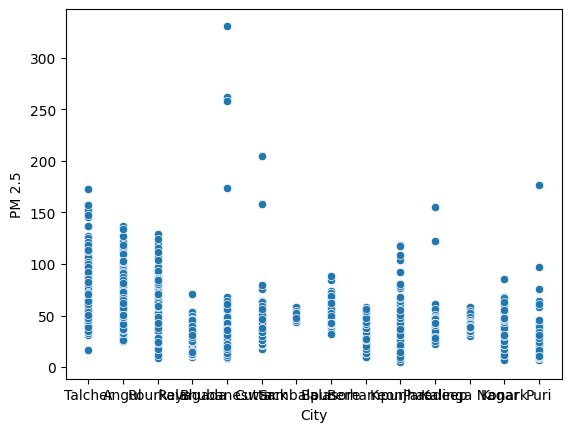

In [37]:
sns.scatterplot(x='City',y='PM 2.5',data = kk)

In [38]:
#transformation

In [39]:
kk.head()

,Stn Code,State,City,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,68,Odisha,Talcher,Industrial Area,11,24,143,102.0
1,68,Odisha,Talcher,Industrial Area,10,23,133,96.0
2,68,Odisha,Talcher,Industrial Area,8,25,125,116.0
3,68,Odisha,Talcher,Industrial Area,10,25,137,107.0
4,68,Odisha,Talcher,Industrial Area,9,26,186,118.0


In [42]:
    kk['Type of Location'].unique()

array(['Industrial Area', 'Residential, Rural and other Areas'],
      dtype=object)

In [43]:
kk['Type of Location'] = kk['Type of Location'].map({'Industrial Area':0,'Residential, Rural and other Areas':1})

In [44]:
kk.head()

,Stn Code,State,City,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,68,Odisha,Talcher,0,11,24,143,102.0
1,68,Odisha,Talcher,0,10,23,133,96.0
2,68,Odisha,Talcher,0,8,25,125,116.0
3,68,Odisha,Talcher,0,10,25,137,107.0
4,68,Odisha,Talcher,0,9,26,186,118.0


In [45]:
kk['State'] = kk['State'].map({'Odisha':0})

In [47]:
kk.drop(columns=['City'],axis=1,inplace=True)

In [48]:
kk.head()

,Stn Code,State,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,68,0,0,11,24,143,102.0
1,68,0,0,10,23,133,96.0
2,68,0,0,8,25,125,116.0
3,68,0,0,10,25,137,107.0
4,68,0,0,9,26,186,118.0


In [49]:
#Model Building

In [52]:
from sklearn.model_selection import train_test_split as tts

In [58]:
x = kk[['Stn Code','State','Type of Location','SO2','NO2','RSPM/PM10']]
y = kk['PM 2.5']

In [65]:
xt,xtt,yt,ytt = tts(x,y,test_size=0.25,random_state = 1)

In [69]:
from sklearn.linear_model import LinearRegression as lr

In [70]:
model = lr()

In [71]:
model.fit(xt,yt)

LinearRegression()

In [75]:
result = model.predict(xtt) 
result

array([ 59.30084209,  62.16011938,  44.34010721,  38.93326724,
        51.21371664,  66.80928888,  48.01987909,  26.67300831,
        17.80463807,  26.73572894,  50.12687627,  42.27920061,
        35.18840075,  79.74849434,  42.18064112,  36.16470532,
        42.99638599,  17.75081373,  57.26816364,  45.95037319,
        21.71331864,  24.10347515,  61.85360163,  50.14097057,
        46.71462944,  25.593925  ,  45.74320217,  42.9100029 ,
        63.42040833,  28.75273263,  40.75855062,  22.97157086,
        16.85681805,  30.74069942,  32.54928957,  30.60293842,
        42.0912092 ,  41.9855744 ,  45.63661368,  25.67385897,
        49.23233537,  40.92885432,  52.8391283 ,  34.03538369,
        77.13549378,  50.94186825,  25.25552247,  45.66664575,
        32.32534525,  44.33632901,  33.37930622,  30.87621457,
        18.7728242 ,  22.91572446,  39.51442513,  27.80336551,
        41.16353149,  52.20141081,  76.25855186,  29.6570277 ,
        26.61357686,  32.39935198,  46.56378483,  38.43

In [77]:
model.score(xtt,ytt)*100

54.93929077279675

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='PM 2.5'>

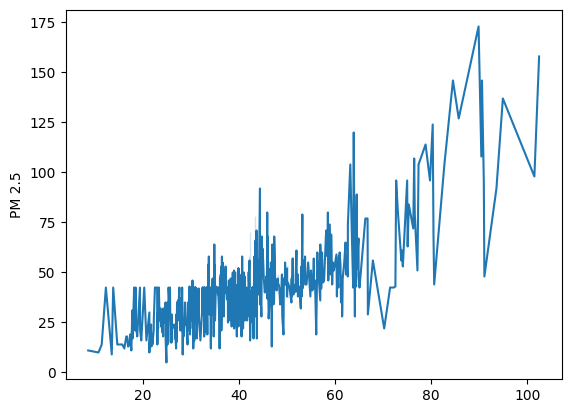

In [78]:
sns.lineplot(x=result,y=ytt)